<a href="https://colab.research.google.com/github/Beenaa99/Strawberry_Leaf_Disease_Detection/blob/main/Strawberry_leaves_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using 3 - layer CNN Model for Training and Classification task :
1. Without providing class weights - 86.56% (very low accuracy for classes with less amount of data)
2. By calculating class weights - 94.30% (class imbalance issue minimized without data augmentation)

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image_dataset_from_directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_dir = '/content/drive/MyDrive/omdena/Image Collection/Strawberry Leaf - Beenaa/Split_data/train'
val_dir = '/content/drive/MyDrive/omdena/Image Collection/Strawberry Leaf - Beenaa/Split_data/val'
test_dir = '/content/drive/MyDrive/omdena/Image Collection/Strawberry Leaf - Beenaa/Split_data/test'

In [ ]:
# Parameters
BATCH_SIZE = 32
IMG_SIZE = (256, 256)
classes = ['angular_leaf_spots_bacteria', 'healthy_leaf', 'leaf_scorch_fungus', 'leaf_spot_fungus']
# Load
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             label_mode='categorical')

val_dataset = image_dataset_from_directory(val_dir,
                                           shuffle=True,
                                           batch_size=BATCH_SIZE,
                                           image_size=IMG_SIZE,
                                           label_mode='categorical')

test_dataset = image_dataset_from_directory(test_dir,
                                            shuffle=False,
                                            batch_size=BATCH_SIZE,
                                            image_size=IMG_SIZE,
                                            label_mode='categorical')
class_names = train_dataset.class_names
# Prefetch datasets
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [6]:
# 3-layer CNN model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(classes), activation='softmax')
])


Found 2788 files belonging to 4 classes.
Found 930 files belonging to 4 classes.
Found 930 files belonging to 4 classes.


In [16]:
# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cnn_model.h5', monitor='val_loss', save_best_only=True)


In [18]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [21]:
# Train the model
history = cnn_model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/50
87/88 [============================>.] - ETA: 7s - loss: 65.3807 - accuracy: 0.6961 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 1077s 11s/step - loss: 65.2874 - accuracy: 0.6962 - val_loss: 0.6056 - val_accuracy: 0.7505
Epoch 2/50
88/88 [==============================] - 15s 161ms/step - loss: 0.4346 - accuracy: 0.8454 - val_loss: 0.3629 - val_accuracy: 0.8785
Epoch 3/50
88/88 [==============================] - 15s 157ms/step - loss: 0.6541 - accuracy: 0.8415 - val_loss: 0.4598 - val_accuracy: 0.8699
Epoch 4/50
88/88 [==============================] - 14s 155ms/step - loss: 0.5711 - accuracy: 0.8551 - val_loss: 0.5792 - val_accuracy: 0.8140
Epoch 5/50
88/88 [==============================] - 15s 156ms/step - loss: 0.3257 - accuracy: 0.9093 - val_loss: 0.3690 - val_accuracy: 0.9086
Epoch 6/50
88/88 [==============================] - 14s 154ms/step - loss: 0.2013 - accuracy: 0.9336 - val_loss: 0.4411 - val_accuracy: 0.8441
Epoch 7/50
88/88 [==============================] - 14s 156ms/step - loss: 0.1302 - accuracy: 0.9548 - val_loss: 0.4163 - val_accuracy: 0.8968


In [19]:
import matplotlib.pyplot as plt

def plot_training_history(history, title="Model Training History"):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.suptitle(title)
    plt.show()

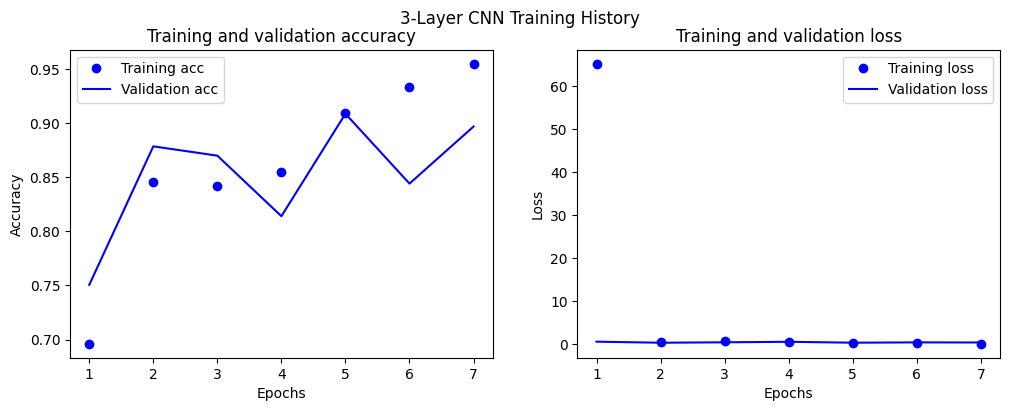

In [23]:
#training history
plot_training_history(history, title="3-Layer CNN Training History")

In [25]:
# Evaluate the model on the test set
test_loss, test_acc = cnn_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")

# Save the final model
cnn_model.save('final_cnn_model.h5')

30/30 [==============================] - 3s 104ms/step - loss: 0.3855 - accuracy: 0.8656
Test accuracy: 0.8656


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, class_names, title="Confusion Matrix"):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

def evaluate_model_and_plot_confusion_matrix(model, test_dataset, class_names, title="Confusion Matrix"):
    # Predict
    y_pred_probs = model.predict(test_dataset)
    y_pred = np.argmax(y_pred_probs, axis=1)


    y_true = np.concatenate([y for x, y in test_dataset], axis=0)
    y_true = np.argmax(y_true, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, class_names, title)


30/30 [==============================] - 7s 201ms/step


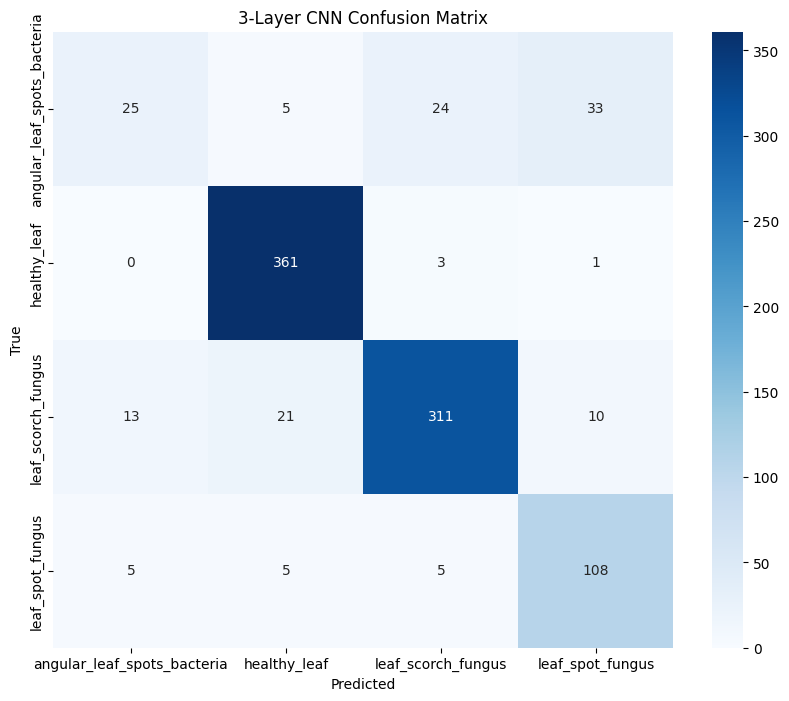

In [28]:
evaluate_model_and_plot_confusion_matrix(cnn_model, test_dataset, classes, title="3-Layer CNN Confusion Matrix")


From the confusion matrix, we notice that the classes which contained less number of pictures i.e less data produced lower accuracy. To combat this, we can use weighted scores.

In [9]:
# Parameters
BATCH_SIZE = 32
IMG_SIZE = (256, 256)
classes = ['angular_leaf_spots_bacteria', 'healthy_leaf', 'leaf_scorch_fungus', 'leaf_spot_fungus']
# Load datasets
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             label_mode='categorical')

val_dataset = image_dataset_from_directory(val_dir,
                                           shuffle=True,
                                           batch_size=BATCH_SIZE,
                                           image_size=IMG_SIZE,
                                           label_mode='categorical')

test_dataset = image_dataset_from_directory(test_dir,
                                            shuffle=False,
                                            batch_size=BATCH_SIZE,
                                            image_size=IMG_SIZE,
                                            label_mode='categorical')
class_names = train_dataset.class_names
# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 2788 files belonging to 4 classes.
Found 930 files belonging to 4 classes.
Found 930 files belonging to 4 classes.


In [10]:
class_names

['angular_leaf_spots_bacteria',
 'healthy_leaf',
 'leaf_scorch_fungus',
 'leaf_spot_fungus']

In [13]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
y_train = np.concatenate([np.argmax(y.numpy(), axis=1) for _, y in train_dataset], axis=0)


In [14]:
# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

In [ ]:
# 3-layer CNN model again (to reset weights)
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cnn_weighted_model.h5', monitor='val_loss', save_best_only=True)

In [21]:
# Train the model with class weights
cnn_weighted = cnn_model.fit(
    train_dataset,
    epochs=50,
    validation_data=val_dataset,
    class_weight=class_weights,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/50
88/88 [==============================] - ETA: 0s - loss: 22.9936 - accuracy: 0.6535

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


88/88 [==============================] - 194s 2s/step - loss: 22.9936 - accuracy: 0.6535 - val_loss: 0.6383 - val_accuracy: 0.7914
Epoch 2/50
88/88 [==============================] - 15s 162ms/step - loss: 0.7023 - accuracy: 0.7941 - val_loss: 0.4715 - val_accuracy: 0.8516
Epoch 3/50
88/88 [==============================] - 15s 162ms/step - loss: 0.6846 - accuracy: 0.7995 - val_loss: 0.2923 - val_accuracy: 0.8968
Epoch 4/50
88/88 [==============================] - 16s 168ms/step - loss: 0.4711 - accuracy: 0.8766 - val_loss: 0.2774 - val_accuracy: 0.8989
Epoch 5/50
88/88 [==============================] - 16s 169ms/step - loss: 0.3725 - accuracy: 0.9006 - val_loss: 0.2768 - val_accuracy: 0.9097
Epoch 6/50
88/88 [==============================] - 17s 181ms/step - loss: 0.3357 - accuracy: 0.8967 - val_loss: 0.5257 - val_accuracy: 0.9183
Epoch 7/50
88/88 [==============================] - 15s 162ms/step - loss: 0.5308 - accuracy: 0.8590 - val_loss: 0.7509 - val_accuracy: 0.8183
Epoch 8/50


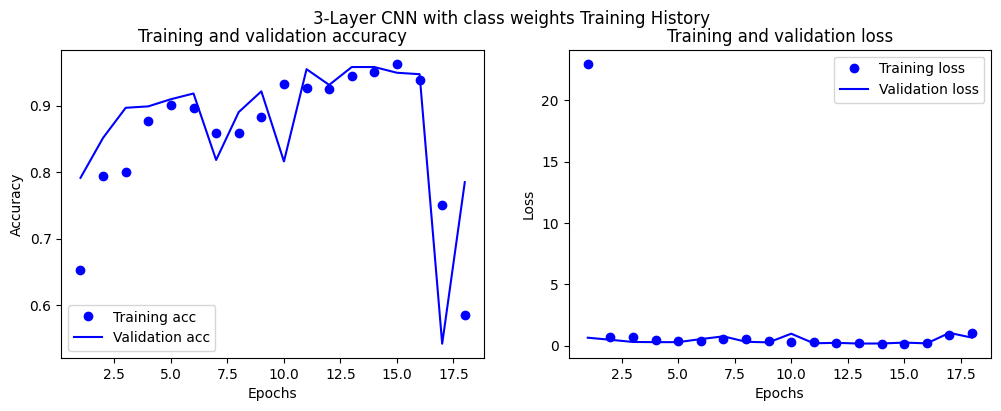

In [23]:
plot_training_history(cnn_weighted, title="3-Layer CNN with class weights Training History")

30/30 [==============================] - 147s 5s/step


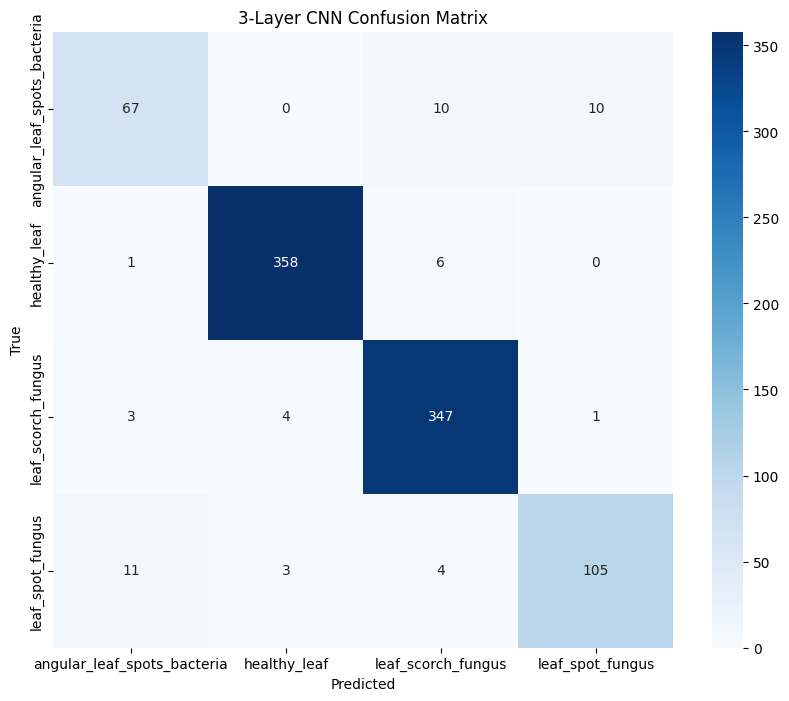

In [26]:
evaluate_model_and_plot_confusion_matrix(cnn_model, test_dataset, classes, title="3-Layer CNN Confusion Matrix")

In [27]:
test_loss_weighted, test_acc_weighted = cnn_model.evaluate(test_dataset)
print(f"Test accuracy with class weights: {test_acc_weighted:.4f}")


30/30 [==============================] - 4s 118ms/step - loss: 0.3307 - accuracy: 0.9430
Test accuracy with class weights: 0.9430


In [29]:
cnn_model.save('cnn_with_class_weights_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
